In [2]:
from oggm import utils
import geopandas as gpd
from oggm import cfg
from oggm import tasks, utils, workflow, graphics, DEFAULT_BASE_URL, global_task
import xarray as xr
import matplotlib.pyplot as plt
from oggm.global_tasks import compile_fixed_geometry_mass_balance
import pandas as pd

from oggm.shop import gcm_climate

In [3]:
def initializa_gdir(glacier_name = 'RGI60-15.03473') :
    # Initialize OGGM and set up the default run parameters
    cfg.initialize(logging_level='WARNING')

    # Local working directory (where OGGM will write its output)
    # WORKING_DIR = utils.gettempdir('OGGM_distr4')
    cfg.PATHS['working_dir'] = utils.get_temp_dir('OGGM_distributed', reset=True)

    rgi_ids = [glacier_name]  # This is Aletsch
    gdir = workflow.init_glacier_directories(rgi_ids, prepro_base_url=DEFAULT_BASE_URL, from_prepro_level=4, prepro_border=80)[0]
    return gdir

2024-05-01 10:45:25: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-05-01 10:45:25: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-05-01 10:45:25: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-05-01 10:45:27: oggm.workflow: init_glacier_directories from prepro level 4 on 1 glaciers.
2024-05-01 10:45:27: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-05-01 10:45:29: oggm.utils: Applying global task compile_run_output on 1 glaciers
2024-05-01 10:45:29: oggm.utils: Applying compile_run_output on 1 gdirs.


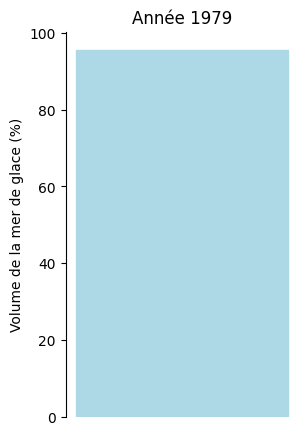

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import xarray as xr
import numpy as np

# Glacier directory avec la Mer de Glace  
gdir = initializa_gdir('RGI60-11.03643')
ds = utils.compile_run_output(gdir, input_filesuffix='_spinup_historical') # sert à récupérer les données de volume

# Calculer le pourcentage de volume de la mer de glace
max_volume = ds.volume.max()
volume_percentage = ds.volume / max_volume
years = ds.time.values
volume_percentage_values = volume_percentage.values
volume_percentage_values = volume_percentage_values * 100
years = [int(year) for year in years]


# Créer la figure
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)

# On crée la première barre
bar_container = ax.bar(0, height=volume_percentage_values[0][0], width=1, bottom=0)
bar = [bar_container[0]]
bar[0].set_color('lightblue')

# On met à jour la figure avec les données des années suivantes
def update(frame):
    if 0 <= frame < len(volume_percentage_values):
        # Mettre à jour la hauteur de la barre
        height = volume_percentage_values[frame][0]
        bar[0].set_height(height)
        ax.set_title(f"Année {years[frame]}")
        ax.set_ylabel("Volume de la mer de glace (%)")
        return bar

# On crée l'animation
ani = animation.FuncAnimation(fig, update, frames=len(volume_percentage_values))

# On enlève les axes inutiles pour faire propre
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(False)

HTML(ani.to_jshtml())


2024-05-01 10:45:32: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-05-01 10:45:32: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-05-01 10:45:32: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-05-01 10:45:32: oggm.workflow: init_glacier_directories from prepro level 4 on 1 glaciers.
2024-05-01 10:45:32: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-05-01 10:45:33: oggm.utils: Applying global task compile_run_output on 1 glaciers
2024-05-01 10:45:33: oggm.utils: Applying compile_run_output on 1 gdirs.


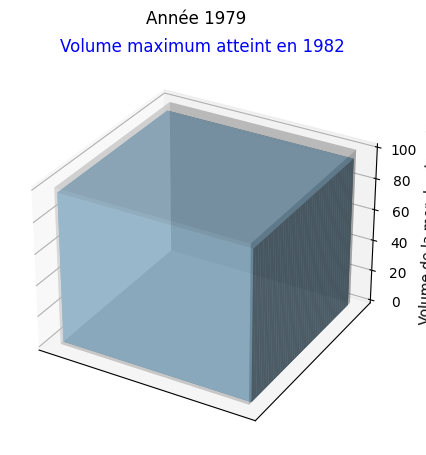

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import xarray as xr
import numpy as np

# Glacier directory avec la Mer de Glace  
gdir = initializa_gdir('RGI60-11.03643')
ds = utils.compile_run_output(gdir, input_filesuffix='_spinup_historical') # sert à récupérer les données de volume

# Calculer le pourcentage de volume de la mer de glace
max_volume = ds.volume.max()
volume_percentage = ds.volume / max_volume
years = ds.time.values
volume_percentage_values = volume_percentage.values
volume_percentage_values = volume_percentage_values * 100
years = [int(year) for year in years]

# Créer la figure
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Histogramme évolutif")
ax.set_ylabel("Années")
ax.set_zlabel("Volume de la mer de glace (%)")
ax.set_zlim(0, 100)  # Fixer les limites de l'axe z à 0 et 100

# Position x des barres
xpos = np.zeros(len(volume_percentage_values))
# Position y des barres (années)
ypos = np.arange(len(volume_percentage_values))
# Hauteur initiale des barres (première année)
height = np.squeeze(volume_percentage_values[0])

bars = ax.bar3d(xpos, ypos, np.zeros(len(volume_percentage_values)), 1, 1, height, color='lightblue')

# Barre de référence (100%)
reference_bar = ax.bar3d(0, -1, 0, 1, len(volume_percentage_values)+2, 100, color='orange', alpha=0.3)

max_text = None

max_year = None

def update(frame):
    global max_year
    ax.clear()
    # Mettre à jour la hauteur des barres
    height = np.squeeze(volume_percentage_values[frame])
    bars = ax.bar3d(xpos, ypos, np.zeros(len(volume_percentage_values)), 1, 1, height, color='lightskyblue', zsort='max')
    ax.set_zlabel("Volume de la mer de glace (%)")
    ax.set_xticks([])  # Supprimer l'axe x
    ax.set_yticks([])  # Supprimer l'axe y
    ax.set_zlim(0, 100)  # Fixer les limites de l'axe z à 0 et 100

    # Ajout de la barre de référence à chaque frame
    reference_bar = ax.bar3d(0, -1, 0, 1, len(volume_percentage_values)+2, 100, color='lightgray', alpha=0.3, zsort='min')

    # Si la hauteur atteint 100%, enregistrer l'année
    if height >= 100 and max_year is None:
        max_year = years[frame]

    # Afficher le titre et le sous-titre quand il y a besoin
    plt.suptitle(f"Année {years[frame]}")
    if max_year is not None:
        ax.set_title(f"Volume maximum atteint en {max_year}", color='blue')


# Création de l'animation
ani = animation.FuncAnimation(fig, update, frames=len(volume_percentage_values), interval=100)

# Affichage de l'animation
HTML(ani.to_jshtml())

# Save the animation as a GIF
ani.save('animation.gif', writer='pillow')


# Volumes des glaciers prédits par les évolutions du giec
cf : https://github.com/OGGM/oggm-standard-projections-csv-files/blob/main/notebooks/compare_oggm_1.6.1_to_rounce_et_al_2023.ipynb 

OU

notebook glacier_change_prediction (j'ai utilisé ça au final)

In [6]:
def get_volumes_by_scenario(glacier_name) : 
    # Initialisation du glacier_directory
    cfg.initialize(logging_level='WARNING')
    cfg.PATHS['working_dir'] = utils.gettempdir('OGGM_gcm_run', reset=True)
    rgi_ids = [glacier_name]
    gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=5, prepro_base_url=DEFAULT_BASE_URL)

    # Download and process GCM data from ISIMIP3b (bias-corrected CMIP6)
    # C'est déjà calculé sur leurs serveurs (ils ont 3 scénarios SSP de pêts) donc on les télécharge
    member = 'mri-esm2-0_r1i1p1f1' 

    for ssp in ['ssp126', 'ssp370','ssp585']:
        # bias correct them
        workflow.execute_entity_task(gcm_climate.process_monthly_isimip_data, gdirs, 
                                    ssp = ssp,
                                    # gcm member -> you can choose another one
                                    member=member,
                                    # recognize the climate file for later
                                    output_filesuffix=f'_ISIMIP3b_{member}_{ssp}'
                                    );

    # Si on veut des infos sur le climat: 
    #print(gdirs[0].get_climate_info())

    # On lance les calculs de projection dans le futur pour chacun des 3 scénarios SSP
    for ssp in ['ssp126', 'ssp370', 'ssp585']:
        rid = f'_ISIMIP3b_{member}_{ssp}'
        workflow.execute_entity_task(tasks.run_from_climate_data, gdirs,
                                    climate_filename='gcm_data',  # use gcm_data, not climate_historical
                                    climate_input_filesuffix=rid,  # use the chosen scenario
                                    init_model_filesuffix='_spinup_historical',  # this is important! Start from 2020 glacier
                                    output_filesuffix=rid,  # recognize the run for later
                                    );
    
    # On récupère les données de volume pour chaque scénario
    # On plot les volumes pour chaque scénario
    color_dict={'ssp126':'blue', 'ssp370':'orange', 'ssp585':'red'}
    scenarios = []
    for ssp in ['ssp126','ssp370', 'ssp585']:
        rid = f'_ISIMIP3b_{member}_{ssp}'
        # Compile the output into one file
        ds = utils.compile_run_output(gdirs, input_filesuffix=rid)
        scenarios.append(ds)
        print(ds)
        # Plot it
        ds.isel(rgi_id=0).volume.plot(label=ssp, c=color_dict[ssp]);
    plt.legend();
    return scenarios

2024-05-01 10:45:46: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-05-01 10:45:46: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-05-01 10:45:46: oggm.cfg: Multiprocessing: using all available processors (N=8)


2024-05-01 10:45:47: oggm.workflow: init_glacier_directories from prepro level 5 on 1 glaciers.
2024-05-01 10:45:47: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-05-01 10:45:48: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 1 glaciers
2024-05-01 10:45:50: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 1 glaciers
2024-05-01 10:45:51: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 1 glaciers
2024-05-01 10:45:52: oggm.workflow: Execute entity tasks [run_from_climate_data] on 1 glaciers
2024-05-01 10:45:52: oggm.workflow: Execute entity tasks [run_from_climate_data] on 1 glaciers
2024-05-01 10:45:53: oggm.workflow: Execute entity tasks [run_from_climate_data] on 1 glaciers
2024-05-01 10:45:53: oggm.utils: Applying global task compile_run_output on 1 glaciers
2024-05-01 10:45:53: oggm.utils: Applying compile_run_output on 1 gdirs.
2024-05-01 10:45:53: oggm.utils: Applying global task compile_run_

<xarray.Dataset>
Dimensions:         (time: 82, rgi_id: 1)
Coordinates:
  * time            (time) float64 2.02e+03 2.021e+03 ... 2.1e+03 2.101e+03
  * rgi_id          (rgi_id) <U14 'RGI60-11.03643'
    hydro_year      (time) int64 2020 2021 2022 2023 ... 2098 2099 2100 2101
    hydro_month     (time) int64 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
    calendar_year   (time) int64 2020 2021 2022 2023 ... 2098 2099 2100 2101
    calendar_month  (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Data variables:
    volume          (time, rgi_id) float64 1.723e+09 1.71e+09 ... 8.762e+08
    volume_bsl      (time, rgi_id) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    volume_bwl      (time, rgi_id) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    area            (time, rgi_id) float64 2.287e+07 2.282e+07 ... 1.471e+07
    length          (time, rgi_id) float64 9.322e+03 9.322e+03 ... 2.844e+03
    calving         (time, rgi_id) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  

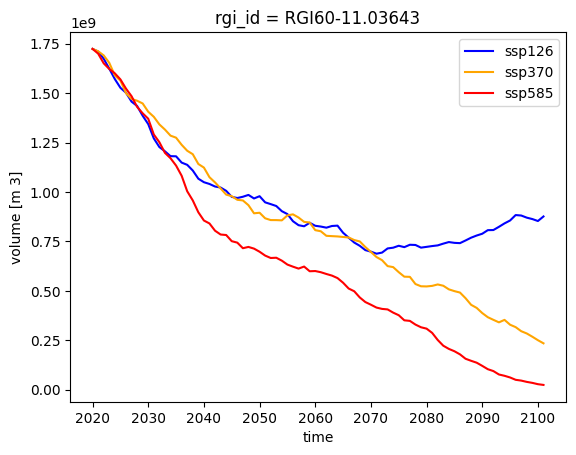

In [7]:
volumes_futurs = get_volumes_by_scenario('RGI60-11.03643')

In [8]:
type(volumes_futurs)

list

Maintenant on a le volume des années 80 à 2020 réels, et les prédictions de 2020 à 20100.
Il ne reste plus qu'à concaténer.

# On rassemble le code avec données réelles (1979-2020) et données simulées (2020-2100)

In [9]:
# Glacier directory avec la Mer de Glace  
gdir = initializa_gdir('RGI60-11.03643')
ds = utils.compile_run_output(gdir, input_filesuffix='_spinup_historical') # sert à récupérer les données de volume


volume_reel = ds.volume.values
years_reel = ds.time.values

years_proj = volumes_futurs[0].time.values

2024-05-01 10:45:54: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-05-01 10:45:54: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-05-01 10:45:54: oggm.cfg: Multiprocessing: using all available processors (N=8)
2024-05-01 10:45:54: oggm.workflow: init_glacier_directories from prepro level 4 on 1 glaciers.
2024-05-01 10:45:54: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2024-05-01 10:45:55: oggm.utils: Applying global task compile_run_output on 1 glaciers
2024-05-01 10:45:55: oggm.utils: Applying compile_run_output on 1 gdirs.


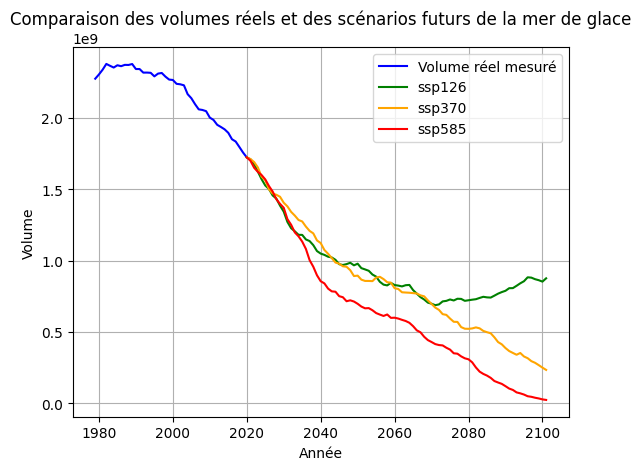

In [10]:
scenarios = len(volumes_futurs)

# Tracé des données réelles
plt.plot(years_reel, volume_reel, color='blue', label='Volume réel mesuré')

# Tracé des scénarios futurs
colors = ['green', 'orange', 'red']
ssp = ['ssp126', 'ssp370', 'ssp585']
for i in range(scenarios):
    plt.plot(years_proj, volumes_futurs[i].volume.values, color=colors[i], label=ssp[i])

# Décoration du graphique
plt.xlabel('Année')
plt.ylabel('Volume')
plt.title('Comparaison des volumes réels et des scénarios futurs de la mer de glace')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

In [11]:
scenario_1_ssp126 = np.concatenate((volume_reel[:-1], volumes_futurs[0].volume.values))
scenario_2_ssp370 = np.concatenate((volume_reel[:-1], volumes_futurs[1].volume.values))
scenario_3_ssp585 = np.concatenate((volume_reel[:-1], volumes_futurs[2].volume.values))
years_total = np.concatenate((years_reel[:-1], years_proj))

In [12]:
years_total

array([1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.,
       2024., 2025., 2026., 2027., 2028., 2029., 2030., 2031., 2032.,
       2033., 2034., 2035., 2036., 2037., 2038., 2039., 2040., 2041.,
       2042., 2043., 2044., 2045., 2046., 2047., 2048., 2049., 2050.,
       2051., 2052., 2053., 2054., 2055., 2056., 2057., 2058., 2059.,
       2060., 2061., 2062., 2063., 2064., 2065., 2066., 2067., 2068.,
       2069., 2070., 2071., 2072., 2073., 2074., 2075., 2076., 2077.,
       2078., 2079., 2080., 2081., 2082., 2083., 2084., 2085., 2086.,
       2087., 2088., 2089., 2090., 2091., 2092., 2093., 2094., 2095.,
       2096., 2097., 2098., 2099., 2100., 2101.])

In [13]:
scenario_1_ssp126.shape

(123, 1)

# Visualisation avec le Cube

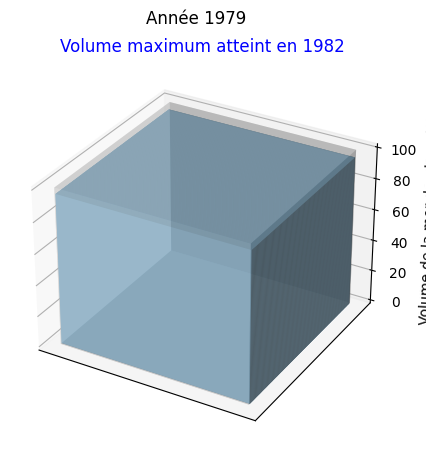

In [16]:
# Calculer le pourcentage de volume de la mer de glace
max_volume = scenario_1_ssp126.max()
volume_percentage = scenario_1_ssp126 / max_volume
volume_percentage = volume_percentage * 100
years = years_total.astype(int)


# Créer la figure
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Histogramme évolutif")
ax.set_ylabel("Années")
ax.set_zlabel("Volume de la mer de glace (%)")
ax.set_zlim(0, 100)  # Fixer les limites de l'axe z à 0 et 100

# Position x des barres
xpos = np.zeros(len(volume_percentage))
# Position y des barres (années)
ypos = np.arange(len(volume_percentage))
# Hauteur initiale des barres (première année)
height = np.squeeze(volume_percentage[0])

bars = ax.bar3d(xpos, ypos, np.zeros(len(volume_percentage)), 1, 1, height, color='lightblue')

# Barre de référence (100%)
reference_bar = ax.bar3d(0, -1, 0, 1, len(volume_percentage)+2, 100, color='orange', alpha=0.3)

max_text = None

max_year = None

def update(frame):
    global max_year
    ax.clear()
    # Mettre à jour la hauteur des barres
    height = np.squeeze(volume_percentage[frame])
    bars = ax.bar3d(xpos, ypos, np.zeros(len(volume_percentage)), 1, 1, height, color='lightskyblue', zsort='max')
    ax.set_zlabel("Volume de la mer de glace (%)")
    ax.set_xticks([])  # Supprimer l'axe x
    ax.set_yticks([])  # Supprimer l'axe y
    ax.set_zlim(0, 100)  # Fixer les limites de l'axe z à 0 et 100

    # Ajout de la barre de référence à chaque frame
    reference_bar = ax.bar3d(0, -1, 0, 1, len(volume_percentage)+2, 100, color='lightgray', alpha=0.3, zsort='min')

    # Si la hauteur atteint 100%, enregistrer l'année
    if height >= 100 and max_year is None:
        max_year = years[frame]

    # Afficher le titre et le sous-titre quand il y a besoin
    plt.suptitle(f"Année {years[frame]}")
    if max_year is not None:
        ax.set_title(f"Volume maximum atteint en {max_year}", color='blue')


# Création de l'animation
ani = animation.FuncAnimation(fig, update, frames=len(volume_percentage), interval=100)

# Affichage de l'animation
HTML(ani.to_jshtml())

# Save the animation as a GIF
# ani.save('animation.gif', writer='pillow')

# Générer le code HTML de l'animation
animation_html = ani.to_jshtml();

# Écrire le code HTML dans un fichier
with open("mdg_volume_scenario_1_ssp126.html", "w") as html_file:
    html_file.write(animation_html);

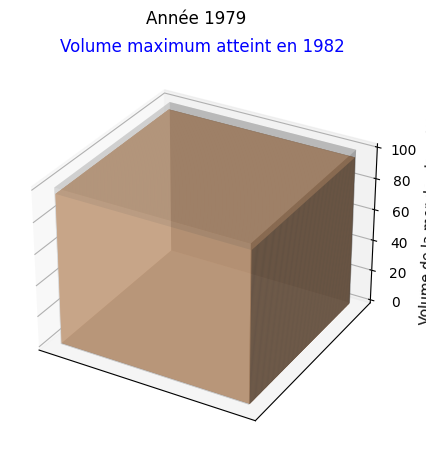

In [17]:
# Calculer le pourcentage de volume de la mer de glace
max_volume = scenario_2_ssp370.max()
volume_percentage = scenario_2_ssp370 / max_volume
volume_percentage = volume_percentage * 100
years = years_total.astype(int)


# Créer la figure
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Histogramme évolutif")
ax.set_ylabel("Années")
ax.set_zlabel("Volume de la mer de glace (%)")
ax.set_zlim(0, 100)  # Fixer les limites de l'axe z à 0 et 100

# Position x des barres
xpos = np.zeros(len(volume_percentage))
# Position y des barres (années)
ypos = np.arange(len(volume_percentage))
# Hauteur initiale des barres (première année)
height = np.squeeze(volume_percentage[0])

bars = ax.bar3d(xpos, ypos, np.zeros(len(volume_percentage)), 1, 1, height, color='sandybrown')

# Barre de référence (100%)
reference_bar = ax.bar3d(0, -1, 0, 1, len(volume_percentage)+2, 100, color='lightgray', alpha=0.3)

max_text = None

max_year = None

def update(frame):
    global max_year
    ax.clear()
    # Mettre à jour la hauteur des barres
    height = np.squeeze(volume_percentage[frame])
    bars = ax.bar3d(xpos, ypos, np.zeros(len(volume_percentage)), 1, 1, height, color='sandybrown', zsort='max')
    ax.set_zlabel("Volume de la mer de glace (%)")
    ax.set_xticks([])  # Supprimer l'axe x
    ax.set_yticks([])  # Supprimer l'axe y
    ax.set_zlim(0, 100)  # Fixer les limites de l'axe z à 0 et 100

    # Ajout de la barre de référence à chaque frame
    reference_bar = ax.bar3d(0, -1, 0, 1, len(volume_percentage)+2, 100, color='lightgray', alpha=0.3, zsort='min')

    # Si la hauteur atteint 100%, enregistrer l'année
    if height >= 100 and max_year is None:
        max_year = years[frame]

    # Afficher le titre et le sous-titre quand il y a besoin
    plt.suptitle(f"Année {years[frame]}")
    if max_year is not None:
        ax.set_title(f"Volume maximum atteint en {max_year}", color='blue')


# Création de l'animation
ani = animation.FuncAnimation(fig, update, frames=len(volume_percentage), interval=100)

# Affichage de l'animation
HTML(ani.to_jshtml())

# Save the animation as a GIF
# ani.save('animation.gif', writer='pillow')

# Générer le code HTML de l'animation
animation_html = ani.to_jshtml();

# Écrire le code HTML dans un fichier
with open("mdg_volume_scenario_2_ssp370.html", "w") as html_file:
    html_file.write(animation_html);

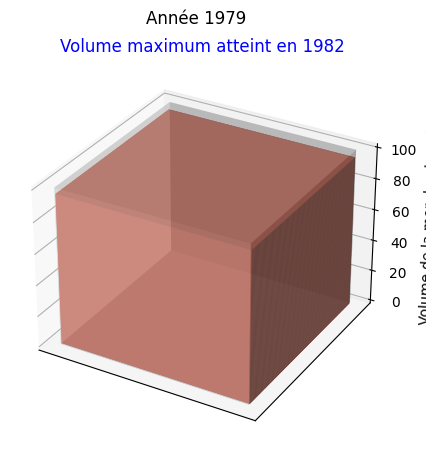

In [18]:
# Calculer le pourcentage de volume de la mer de glace
max_volume = scenario_3_ssp585.max()
volume_percentage = scenario_3_ssp585 / max_volume
volume_percentage = volume_percentage * 100
years = years_total.astype(int)


# Créer la figure
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Histogramme évolutif")
ax.set_ylabel("Années")
ax.set_zlabel("Volume de la mer de glace (%)")
ax.set_zlim(0, 100)  # Fixer les limites de l'axe z à 0 et 100

# Position x des barres
xpos = np.zeros(len(volume_percentage))
# Position y des barres (années)
ypos = np.arange(len(volume_percentage))
# Hauteur initiale des barres (première année)
height = np.squeeze(volume_percentage[0])

bars = ax.bar3d(xpos, ypos, np.zeros(len(volume_percentage)), 1, 1, height, color='tomato')

# Barre de référence (100%)
reference_bar = ax.bar3d(0, -1, 0, 1, len(volume_percentage)+2, 100, color='lightgray', alpha=0.3)

max_text = None

max_year = None

def update(frame):
    global max_year
    ax.clear()
    # Mettre à jour la hauteur des barres
    height = np.squeeze(volume_percentage[frame])
    bars = ax.bar3d(xpos, ypos, np.zeros(len(volume_percentage)), 1, 1, height, color='tomato', zsort='max')
    ax.set_zlabel("Volume de la mer de glace (%)")
    ax.set_xticks([])  # Supprimer l'axe x
    ax.set_yticks([])  # Supprimer l'axe y
    ax.set_zlim(0, 100)  # Fixer les limites de l'axe z à 0 et 100

    # Ajout de la barre de référence à chaque frame
    reference_bar = ax.bar3d(0, -1, 0, 1, len(volume_percentage)+2, 100, color='lightgray', alpha=0.3, zsort='min')

    # Si la hauteur atteint 100%, enregistrer l'année
    if height >= 100 and max_year is None:
        max_year = years[frame]

    # Afficher le titre et le sous-titre quand il y a besoin
    plt.suptitle(f"Année {years[frame]}")
    if max_year is not None:
        ax.set_title(f"Volume maximum atteint en {max_year}", color='blue')


# Création de l'animation
ani = animation.FuncAnimation(fig, update, frames=len(volume_percentage), interval=100)

# Affichage de l'animation
HTML(ani.to_jshtml())

# Save the animation as a GIF
# ani.save('animation.gif', writer='pillow')

# Générer le code HTML de l'animation
animation_html = ani.to_jshtml();

# Écrire le code HTML dans un fichier
with open("mdg_volume_scenario_3_ssp585.html", "w") as html_file:
    html_file.write(animation_html);